In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.ensemble import  RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mnist_train.csv')

In [3]:
df.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x = df.iloc[:,1:].values
y = df.iloc[:,0].values
y


array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

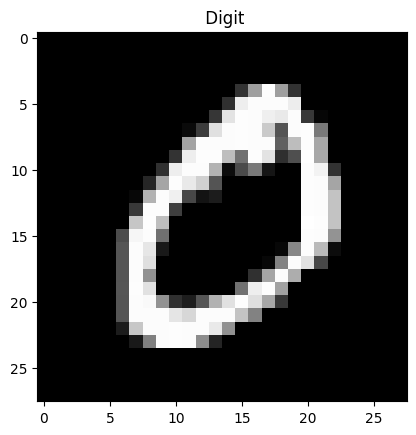

In [5]:
#image 
digit = x[1,:].reshape(28,28)
plt.imshow(digit, cmap='gray')
plt.title(' Digit')
plt.show()


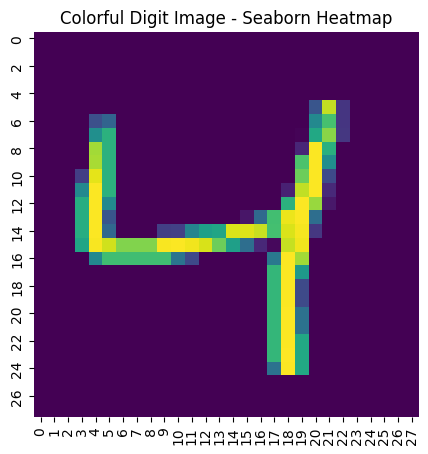

In [6]:
cdigit = x[2,:].reshape(28,28)
plt.figure(figsize=(10, 5))
sn.heatmap(cdigit, cmap='viridis', annot=False, cbar=False, square=True)
plt.title('Colorful Digit Image - Seaborn Heatmap')
plt.show()

In [7]:
#feature importance

rf = RandomForestClassifier()
rf.fit(x,y)
rf



RandomForestClassifier()

In [8]:
rf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.67797073e-07,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.12398324e-07, 3.51023900e-07,
       2.64468583e-06, 2.14649965e-06, 5.57721362e-06, 7.19603084e-07,
       8.82188985e-07, 3.99530548e-06, 2.40580667e-06, 4.09409540e-06,
       6.68435830e-06, 3.45620925e-06, 5.45660355e-07, 1.41460338e-06,
       1.60498724e-06, 7.21135085e-07, 7.19450001e-07, 7.33558881e-07,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [9]:
# working


dff = pd.read_csv('play_tennis.csv')
dff.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [10]:
#encoding ordinal data from scartch

In [11]:
dff['humidity'].unique()


array(['High', 'Normal'], dtype=object)

In [12]:
dff['wind'].unique()


array(['Weak', 'Strong'], dtype=object)

In [13]:
dff['temp'].unique()


array(['Hot', 'Mild', 'Cool'], dtype=object)

In [14]:
dff['humidity'] = dff['humidity'].map({'High':1,'Normal':0})
dff['wind'] = dff['wind'].map({'Strong':1,'Weak':0})
dff['temp'] = dff['temp'].map({'Hot':2,'Mild':1,'Cool':0})
#lanel encoding

dff['play'] = dff['play'].map({'No':0,'Yes':1})

In [15]:
dff.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,2,1,0,0
1,D2,Sunny,2,1,1,0
2,D3,Overcast,2,1,0,1
3,D4,Rain,1,1,0,1
4,D5,Rain,0,0,0,1


In [60]:
# ordinal encoding using sklearn

from sklearn.preprocessing import  OrdinalEncoder
from sklearn.model_selection import train_test_split


data = pd.read_csv('play_tennis.csv')
x_train,x_test,y_train,y_test = train_test_split(data.iloc[:,2:5],data.iloc[:,-1],test_size = 0.2)

oeo = OrdinalEncoder(categories=[['Cool','Mild','Hot'],['Normal','High'],['Weak','Strong']])
oeo.fit(x_train)

OrdinalEncoder(categories=[['Cool', 'Mild', 'Hot'], ['Normal', 'High'],
                           ['Weak', 'Strong']])

In [61]:
data[['temp','humidity','wind']] = oeo.transform(data[['temp','humidity','wind']])

In [62]:
data.head()


,day,outlook,temp,humidity,wind,play
0,D1,Sunny,2.0,1.0,0.0,No
1,D2,Sunny,2.0,1.0,1.0,No
2,D3,Overcast,2.0,1.0,0.0,Yes
3,D4,Rain,1.0,1.0,0.0,Yes
4,D5,Rain,0.0,0.0,0.0,Yes


In [63]:
#Label Encoding
from sklearn.preprocessing import  LabelEncoder

le = LabelEncoder()

le.fit(y_train)



LabelEncoder()

In [64]:
data['play'] = le.transform(data.iloc[:,-1].values)

In [65]:
data.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,2.0,1.0,0.0,0
1,D2,Sunny,2.0,1.0,1.0,0
2,D3,Overcast,2.0,1.0,0.0,1
3,D4,Rain,1.0,1.0,0.0,1
4,D5,Rain,0.0,0.0,0.0,1


In [66]:
#one hot encoding
data['outlook'].value_counts()



outlook
Sunny       5
Rain        5
Overcast    4
Name: count, dtype: int64

In [67]:
#pandas 
datap = pd.get_dummies(data,columns=['outlook'],drop_first=True)

In [68]:
datap.head()

,day,temp,humidity,wind,play,outlook_Rain,outlook_Sunny
0,D1,2.0,1.0,0.0,0,False,True
1,D2,2.0,1.0,1.0,0,False,True
2,D3,2.0,1.0,0.0,1,False,False
3,D4,1.0,1.0,0.0,1,True,False
4,D5,0.0,0.0,0.0,1,True,False


In [76]:
#sklearn
from sklearn.preprocessing import OneHotEncoder

data_encode = data[['outlook']]

ohe = OneHotEncoder()
ohe


OneHotEncoder()

In [95]:
outlook_arr = ohe.fit_transform(data_encode).toarray()

In [94]:
outlook_cat = data['outlook'].unique()

In [112]:
new_encoded_data = pd.DataFrame(outlook_arr,columns = outlook_cat)

new_encoded_data.head()

,Sunny,Overcast,Rain
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [103]:
data = data.drop('outlook',axis=1)

In [104]:
data.head()

,day,temp,humidity,wind,play
0,D1,2.0,1.0,0.0,0
1,D2,2.0,1.0,1.0,0
2,D3,2.0,1.0,0.0,1
3,D4,1.0,1.0,0.0,1
4,D5,0.0,0.0,0.0,1


In [115]:
data_sk = pd.concat([data,new_encoded_data],axis=1)

In [117]:
data_sk.head()

,day,temp,humidity,wind,play,Sunny,Overcast,Rain
0,D1,2.0,1.0,0.0,0,0.0,0.0,1.0
1,D2,2.0,1.0,1.0,0,0.0,0.0,1.0
2,D3,2.0,1.0,0.0,1,1.0,0.0,0.0
3,D4,1.0,1.0,0.0,1,0.0,1.0,0.0
4,D5,0.0,0.0,0.0,1,0.0,1.0,0.0


Working Feature importance using Decision tree

In [125]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split

clf =DecisionTreeClassifier()

x = data_sk.iloc[:,1:-1].values
y = data_sk.iloc[:,-1].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [142]:
clf.fit(x_train,y_train)


DecisionTreeClassifier()

[Text(0.5, 0.875, 'x[3] <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [7, 4]'),
 Text(0.25, 0.625, 'x[5] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.625, 'x[0] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.625, 0.375, 'x[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]')]

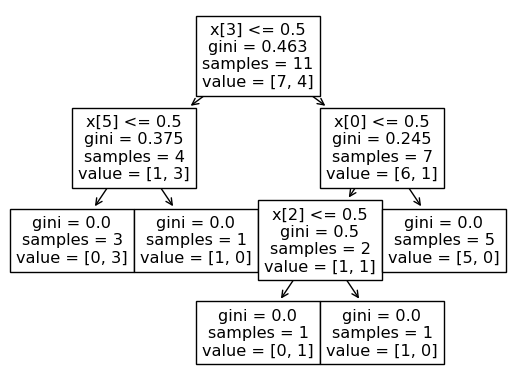

In [143]:
plot_tree(clf)

In [144]:
n3 = 11/11*(0.463 - 7/11*(0.245)-4/11*(0.375))
n0 = 7/11*(0.245 - 2/7*(0.5)-0)
n2 = 2/11*(0.5)
n5 = 4/11*(0.375)

In [145]:
n = n0+n0+n2+n5
N = np.array([n0,0,n2,n3,0,n5])

calculte_feature_importances = N/n
calculte_feature_importances

array([0.18193384, 0.        , 0.25445293, 0.4778626 , 0.        ,
       0.38167939])

In [146]:
clf.feature_importances_

array([0.14030612, 0.        , 0.19642857, 0.36862245, 0.        ,
       0.29464286])